A big part of time series analysis involves filtering - i.e. changing attributes of a time series or deconstructing it into its component parts. Often we need to do quite a bit of time series before we build a model to simulate the underlying process.


To run the ADF test we need to chose a lag length so that the residuals aren't serially correlated (aka Autocorrelation), this is to minimize error terms in a time series as to avoid transferring them from one period to another. For choosing the lags the AIC (Akaike's information criterion) will be minimized. 

In [25]:
#imports
import pandas as pd 
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import pickle
import seaborn as sns

In [ ]:
# model = SARIMAX(y_log, order=(2,1,1))
# model_fit = model.fit()
# forecast = model_fit.forecast(24)

In [13]:
# load the files
log_af_act = pd.read_csv('../data/log_af_act.csv',  index_col=0)
log_af_rec = pd.read_csv('../data/log_af_rec.csv',  index_col=0)
log_asia_act = pd.read_csv('../data/log_asia_act.csv',  index_col=0)
log_asia_rec = pd.read_csv('../data/log_asia_rec.csv',  index_col=0)
log_eu_act = pd.read_csv('../data/log_eu_act.csv',  index_col=0)
log_eu_rec = pd.read_csv('../data/log_eu_rec.csv',  index_col=0)
log_noam_act = pd.read_csv('../data/log_noam_act.csv',  index_col=0)
log_noam_rec = pd.read_csv('../data/log_noam_rec.csv',  index_col=0)
log_soam_act = pd.read_csv('../data/log_soam_act.csv',  index_col=0)
log_soam_rec = pd.read_csv('../data/log_soam_rec.csv',  index_col=0)

In [12]:
# load the models
import warnings
africa_active = pickle.load(open('../models/af_act_model.sav', 'rb'))
africa_recovered = pickle.load(open('../models/af_rec_model.sav', 'rb')) 
asia_active = pickle.load(open('../models/asia_act_model.sav', 'rb'))
asia_recovered = pickle.load(open('../models/asia_rec_model.sav', 'rb')) 
eu_active = pickle.load(open('../models/eu_act_model.sav', 'rb')) 
eu_recovered = pickle.load(open('../models/eu_rec_model.sav', 'rb')) 
noam_active = pickle.load(open('../models/noam_act_model.sav', 'rb')) 
noam_recovered = pickle.load(open('../models/noam_rec_model.sav', 'rb'))
soam_active = pickle.load(open('../models/soam_act_model.sav', 'rb')) 
soam_recovered = pickle.load(open('../models/soam_rec_model.sav', 'rb'))

In [14]:
africa_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  239
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 179.593
Method:                       css-mle   S.D. of innovations              0.114
Date:                Sun, 08 Aug 2021   AIC                           -353.187
Time:                        00:21:52   BIC                           -342.757
Sample:                             2   HQIC                          -348.984
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.404      0.686      -0.003       0.002
ma.L1.D2.y    -0.8029      0.048    -16.879      0.000      -0.896      -0.710
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2455           +0.0000j            1.2455            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
africa_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  230
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 222.630
Method:                       css-mle   S.D. of innovations              0.092
Date:                Sun, 08 Aug 2021   AIC                           -437.260
Time:                        00:22:51   BIC                           -423.508
Sample:                             2   HQIC                          -431.712
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.077e-05      0.003      0.025      0.980      -0.005       0.006
ar.L1.D2.y    -0.8624      0.062    -13.856      0.000      -0.984      -0.740
ar.L2.D2.y    -0.3194      0.062     -5.144      0.000      -0.441      -0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3500           -1.1438j            1.7694           -0.3881
AR.2           -1.3500           +1.1438j            1.7694            0.3881
-----------------------------------------------------------------------------
"""

In [26]:
log_af_act.head()

,active
date,
2020-03-02,0.000000
2020-03-03,0.000000
2020-03-04,0.000000
2020-03-05,0.693147
2020-03-06,0.693147


<AxesSubplot:xlabel='date', ylabel='active'>

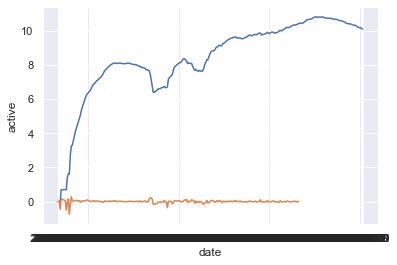

In [30]:
sns.set_theme(style="darkgrid")
# plt.figure(figsize=(15,10))
# plt.plot(y_log.diff())
# plt.plot(model_fit.predict(), color = 'red')


# Plot the responses for different events and regions
sns.lineplot(x="date", y="active", data=log_af_act)
sns.lineplot(data=africa_active.predict())

In [16]:
asia_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  273
Model:                     ARMA(1, 0)   Log Likelihood                 278.043
Method:                       css-mle   S.D. of innovations              0.086
Date:                Sun, 08 Aug 2021   AIC                           -550.086
Time:                        00:23:23   BIC                           -539.258
Sample:                             0   HQIC                          -545.740
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0391      3.614      2.778      0.005       2.956      17.122
ar.L1.y        0.9997      0.000   2618.530      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [17]:
asia_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  272
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 175.404
Method:                       css-mle   S.D. of innovations              0.127
Date:                Sun, 08 Aug 2021   AIC                           -342.809
Time:                        00:24:01   BIC                           -328.385
Sample:                             1   HQIC                          -337.018
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0761      0.060      1.276      0.202      -0.041       0.193
ar.L1.D.y      0.9918      0.010    101.013      0.000       0.973       1.011
ma.L1.D.y     -0.9196      0.021    -43.430      0.000      -0.961      -0.878
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0083           +0.0000j            1.0083            0.0000
MA.1            1.0874           +0.0000j            1.0874            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
eu_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  264
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -372.474
Method:                       css-mle   S.D. of innovations              0.990
Date:                Sun, 08 Aug 2021   AIC                            752.948
Time:                        00:24:31   BIC                            767.252
Sample:                             2   HQIC                           758.696
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.025     -0.021      0.983      -0.051       0.049
ar.L1.D2.y    -0.8939      0.053    -16.889      0.000      -0.998      -0.790
ar.L2.D2.y    -0.5033      0.053     -9.544      0.000      -0.607      -0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8880           -1.0947j            1.4096           -0.3585
AR.2           -0.8880           +1.0947j            1.4096            0.3585
-----------------------------------------------------------------------------
"""

In [19]:
eu_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -231.262
Method:                       css-mle   S.D. of innovations              0.609
Date:                Sun, 08 Aug 2021   AIC                            468.523
Time:                        00:25:26   BIC                            479.088
Sample:                             2   HQIC                           472.775
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.022      0.042      0.967      -0.042       0.044
ar.L1.D2.y    -0.7582      0.047    -16.269      0.000      -0.850      -0.667
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3188           +0.0000j            1.3188            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
noam_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  262
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -219.271
Method:                           css   S.D. of innovations              0.559
Date:                Sun, 08 Aug 2021   AIC                            442.542
Time:                        00:25:48   BIC                            449.679
Sample:                             1   HQIC                           445.410
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0589      0.035      1.707      0.088      -0.009       0.127
==============================================================================
"""

In [22]:
noam_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  248
Model:                     ARMA(1, 0)   Log Likelihood                -167.868
Method:                       css-mle   S.D. of innovations              0.472
Date:                Sun, 08 Aug 2021   AIC                            341.735
Time:                        00:26:11   BIC                            352.276
Sample:                             0   HQIC                           345.978
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6327      3.990      2.665      0.008       2.812      18.454
ar.L1.y        0.9954      0.005    203.857      0.000       0.986       1.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0046           +0.0000j            1.0046            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
soam_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  241
Model:                     ARMA(1, 0)   Log Likelihood                 -58.888
Method:                       css-mle   S.D. of innovations              0.305
Date:                Sun, 08 Aug 2021   AIC                            123.776
Time:                        00:26:32   BIC                            134.231
Sample:                             0   HQIC                           127.988
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6751      5.256      1.460      0.144      -2.627      17.977
ar.L1.y        0.9985      0.002    531.939      0.000       0.995       1.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
soam_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  228
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  41.003
Method:                       css-mle   S.D. of innovations              0.202
Date:                Sun, 08 Aug 2021   AIC                            -74.006
Time:                        00:26:51   BIC                            -60.289
Sample:                             2   HQIC                           -68.471
                                                                              
==============================================================================
                 coef    std err          z      P>|z|        [0.0        1.0]
------------------------------------------------------------------------------
const         -0.0013      0.006     -0.225      0.822        -inf         inf
ar.L1.D2.y    -0.8621      0.060    -14.468      0.000        -inf         inf
ar.L2.D2.y    -0.4727      0.059     -7.967      0.000        -inf         inf
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9118           -1.1331j            1.4544           -0.3578
AR.2           -0.9118           +1.1331j            1.4544            0.3578
-----------------------------------------------------------------------------
"""

In [ ]:
# Call figure() and plot() on the plt
plt.figure(figsize=(15,10))
plt.plot(y_log.diff())
plt.plot(model_fit.predict(), color = 'red')

In [ ]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 12

# Convert that range into a dataframe that includes your predictions
date_range = pd.date_range(y_log.index[-1], 
                           periods = forecast_period,
                           freq='MS').strftime("%Y-%m-%d").tolist()
print(date_range)
# Plot your future predictions
future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)

future_months['Prediction'] = pd.Series(dict(zip(date_range,(forecast[0]))),dtype='object')

# Plot your future predictions
plt.figure(figsize=(15,10))
plt.plot(y_log)
plt.plot(y_log['Nov 1960'].append(future_months['Prediction']))
plt.show()